In [141]:
import random as rd
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv("Ice Cream Sales - temperatures.csv")

In [143]:
df

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
...,...,...
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91


In [144]:
X_train = df[["Temperature"]]

In [145]:
X_train

,Temperature
0,39
1,40
2,41
3,42
4,43
...,...
360,99
361,99
362,99
363,101


In [146]:
y_train = df["Ice Cream Profits"]

In [147]:
y_train

0      13.17
1      11.88
2      18.82
3      18.65
4      17.02
       ...  
360    85.13
361    87.08
362    89.29
363    81.91
364    85.02
Name: Ice Cream Profits, Length: 365, dtype: float64

In [148]:
type(y_train)

pandas.core.series.Series

In [149]:
type(X_train)

pandas.core.frame.DataFrame

In [150]:
w_init = pd.Series(rd.random() for _ in range(1))

In [151]:
w_init

0    0.363201
dtype: float64

In [152]:
b_init = 0

In [153]:
w_init.shape

(1,)

In [154]:
X_train.shape

(365, 1)

In [155]:
y_train.shape

(365,)

### Tahmin Yapma

In [156]:
def predict(x, w, b):
    return np.dot(x, w) + b


In [157]:
predict(X_train.iloc[0], w_init, b_init)

14.1648401898583

In [158]:
def compute_cost(X_train, y_train, w, b):
    cost = 0
    m = X_train.shape[0]
    for i in range(m):
       cost+= (predict(X_train.iloc[i], w, b) - y_train.iloc[i]) ** 2
    return cost / (2 * m)
    

In [159]:
compute_cost(X_train, y_train, w_init, b_init)

400.1033032688624

In [180]:
def compute_gradient(X_train, y_train, w, b):
    weight = 0
    bias = 0
    m = X_train.shape[0]
    for i in range(m):
        weight += (predict(X_train.iloc[i], w, b) - y_train.iloc[i]) * X_train.iloc[i]
        bias +=  (predict(X_train.iloc[i], w, b) - y_train.iloc[i])

    w_gradient = weight.values/m
    b_gradient = bias/m
    return w_gradient , b_gradient

In [181]:
l_rate = 0.01
num_iter = 100

In [184]:
def gradient_descent (X_train, y_train, w, b, l_rate, num_iter, compute_cost, compute_gradient):
    w_last = w
    b_last = b

    j_w_list = []
    w_list = []

    for i in range(num_iter):

        w_gradient , b_gradient = compute_gradient(X_train, y_train, w_init, b_init)

        step_amount_w = w_gradient * l_rate
        step_amount_b = b_gradient * l_rate

        w_last = w_last - step_amount_w
        b_last = b_last - step_amount_b

        j_w_list.append(compute_cost(X_train, y_train, w_last, b_last))
        w_list.append(w_last)

        print("Iteration:", i+1, "w value:", w_last, "b value:", b_last, "Cost value:", compute_cost(X_train, y_train, w_last, b_last))

    return j_w_list, w_list
                        

In [185]:
j_w_list , w_list = gradient_descent (X_train, y_train, w_init, b_init, l_rate, num_iter, compute_cost, compute_gradient)

Iteration: 1 w value: 0    20.502454
dtype: float64 b value: 0.2596010774090992 Cost value: 1046490.0393902303
Iteration: 2 w value: 0    40.641707
dtype: float64 b value: 0.5192021548181984 Cost value: 4265891.2275722
Iteration: 3 w value: 0    60.78096
dtype: float64 b value: 0.7788032322272976 Cost value: 9658603.667849185
Iteration: 4 w value: 0    80.920213
dtype: float64 b value: 1.0384043096363968 Cost value: 17224627.36022115
Iteration: 5 w value: 0    101.059465
dtype: float64 b value: 1.298005387045496 Cost value: 26963962.30468817
Iteration: 6 w value: 0    121.198718
dtype: float64 b value: 1.557606464454595 Cost value: 38876608.501250155
Iteration: 7 w value: 0    141.337971
dtype: float64 b value: 1.8172075418636942 Cost value: 52962565.94990722
Iteration: 8 w value: 0    161.477224
dtype: float64 b value: 2.0768086192727933 Cost value: 69221834.6506592
Iteration: 9 w value: 0    181.616477
dtype: float64 b value: 2.3364096966818924 Cost value: 87654414.60350615
Iteration

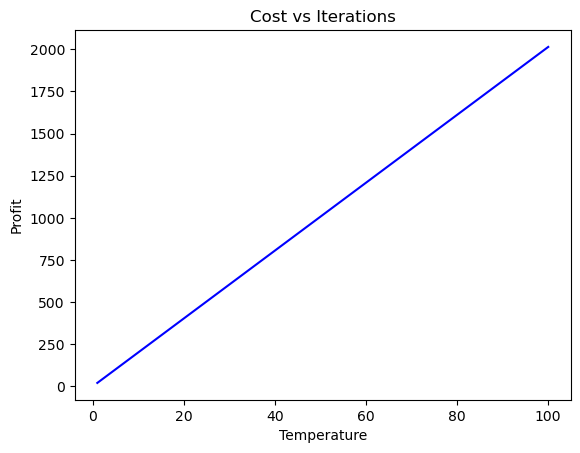

In [186]:
plt.plot(range(1,num_iter + 1), w_list , color="blue")
plt.xlabel('Temperature')
plt.ylabel('Profit')
plt.title('Cost vs Iterations')
plt.show()